In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler

names = [
       'mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model_year'
    ,  'origin'
    ,  'car_name'
]

In [2]:
df = pd.read_csv(r"D:\OneDrive - NITT\CODE\Python Scripts\Code_2023\mpg\auto-mpg.data",
            na_values = "?",sep = '\s+',header = None, names = names)

In [3]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model_year  origin                   car_name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

In [4]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [8]:
X = df.drop(['car_name','mpg'],axis=1)
y = df['mpg']

In [9]:
from sklearn.model_selection import train_test_split

# Step 1

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [11]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Step 2.a

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# Step 2.b

In [13]:
mse = mean_squared_error(y_test, y_pred, squared=True)
print('Coefficients:',list(zip(list(X_train),regr.coef_)),end='\n\n')
print("Mean squared error:",round(mse,2),end='\n')
print("Variance score:",round(regr.score(X_test,y_test),2),end='\n')

Coefficients: [(array([ 0.30486156,  0.28457757,  0.14142863,  0.75480297,  1.1217589 ,
        0.49452752, -0.68982474]), -0.5870552548302916), (array([-0.87318372, -0.53588042, -0.32949862, -0.49312922, -0.22893966,
       -0.0572982 , -0.68982474]), 1.5652725540141423), (array([ 0.30486156, -0.23665456, -0.19868549, -0.00252992, -0.37111846,
       -0.33321105, -0.68982474]), -0.8142052897732908), (array([ 1.48290683,  1.18225513,  1.18793363,  1.3680521 , -0.72656545,
       -1.16094962, -0.68982474]), -5.157670507844962), (array([-0.87318372, -1.05711255, -1.06205212, -1.32309939,  0.30423083,
        1.32226608, -0.68982474]), 0.10676699321071799), (array([ 1.48290683,  1.97375578,  2.23443863,  1.59429934, -1.18864653,
        0.21861466, -0.68982474]), 2.782554555472517), (array([-0.87318372, -1.02815521, -1.11437737, -1.35882264, -0.08676086,
        1.04635323,  0.55106689]), 1.300240117827484)]

Mean squared error: 10.71
Variance score: 0.79


# Step-3a,b

Coefficients: cylinders -> [-6.20036374]

Mean squared error: 21.81
Variance score: 0.57


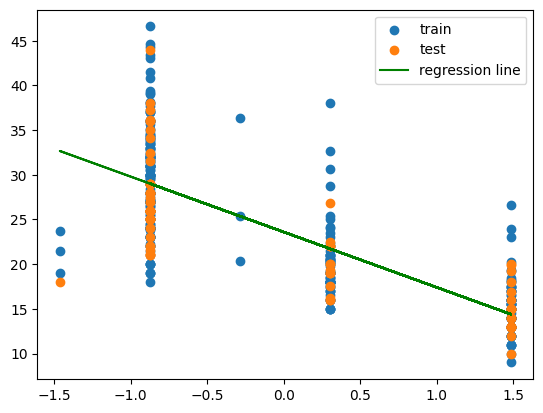

Coefficients: displacement -> [-6.44681676]

Mean squared error: 21.23
Variance score: 0.58


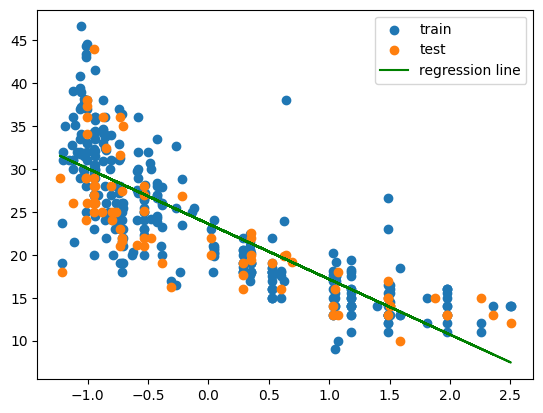

Coefficients: horsepower -> [-6.21486731]

Mean squared error: 22.15
Variance score: 0.57


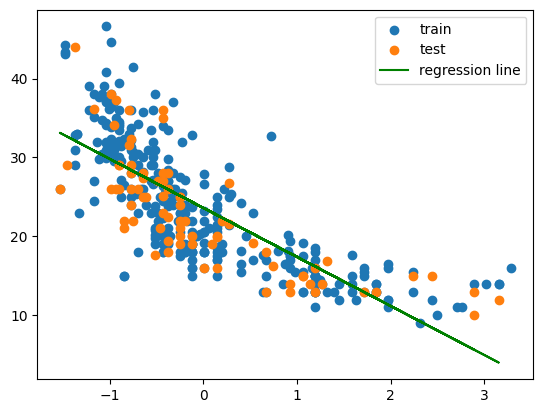

Coefficients: weight -> [-6.63736678]

Mean squared error: 17.69
Variance score: 0.65


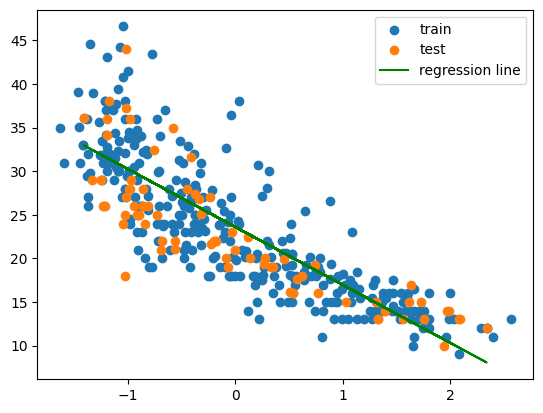

Coefficients: acceleration -> [3.27312035]

Mean squared error: 40.07
Variance score: 0.21


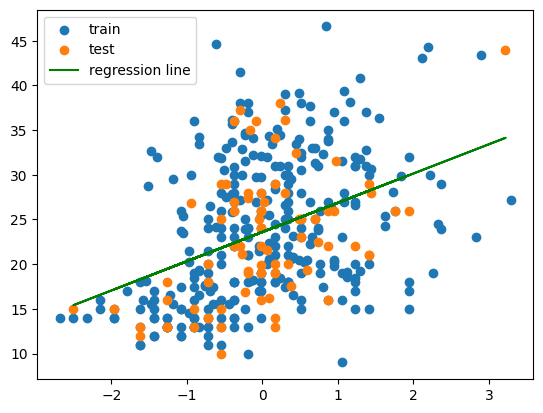

Coefficients: model_year -> [4.69029072]

Mean squared error: 37.42
Variance score: 0.27


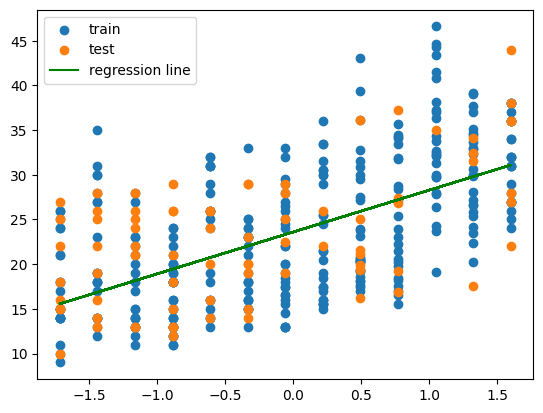

Coefficients: origin -> [4.52037861]

Mean squared error: 36.56
Variance score: 0.28


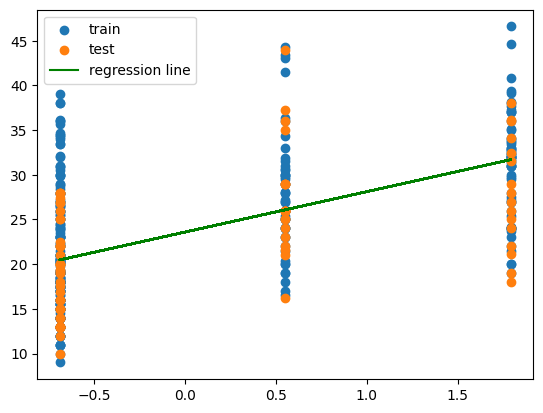

In [14]:
for col in X:
    X_temp = X[[col]]
    X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2,random_state=42)
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    regr = linear_model.LinearRegression()
    regr.fit(X_train.reshape(-1,1), y_train)
    y_pred = regr.predict(X_test.reshape(-1,1))
    
    mse = mean_squared_error(y_test, y_pred, squared=True)
    print('Coefficients:',col,'->',regr.coef_,end='\n\n')
    print("Mean squared error:",round(mse,2),end='\n')
    print("Variance score:",round(regr.score(X_test.reshape(-1,1),y_test),2),end='\n')
    plt.scatter(X_train,y_train,label='train')
    plt.scatter(X_test,y_test,label='test')
    plt.plot(X_test,y_pred,label='regression line',color='green')
    plt.legend()
    plt.show()

# Step-4-a,b

In [15]:
keys = list(X)
keys.append('All')

features_mse = dict.fromkeys(keys)
features_var = dict.fromkeys(keys)

for i in tqdm(range(10)):
    for col in X:
        X_temp = X[[col]]
        X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2,random_state=i)
        X_train = sc_X.fit_transform(X_train)
        X_test = sc_X.transform(X_test)

        regr = linear_model.LinearRegression()
        regr.fit(X_train.reshape(-1,1), y_train)
        y_pred = regr.predict(X_test.reshape(-1,1))

        mse = mean_squared_error(y_test, y_pred, squared=True)
        mse = round(mse,2)
        var = round(regr.score(X_test.reshape(-1,1),y_test),2)
        
        if not features_mse.get(col):
            features_mse[col] = [mse]
            features_var[col] = [var]
        else:
            features_mse[col].append(mse)
            features_var[col].append(var)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=i)
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)

    mse = mean_squared_error(y_test, y_pred, squared=True)
    mse = round(mse,2)
    var = round(regr.score(X_test,y_test),2)
    
    if not features_mse.get('All'):
            features_mse['All'] = [mse]
            features_var['All'] = [var]
    else:
        features_mse['All'].append(mse)
        features_var['All'].append(var)

  0%|          | 0/10 [00:00<?, ?it/s]

In [16]:
mean_Mse = {feature:round(np.mean(features_mse[feature]),2) for feature in features_mse}
mean_Variance = {feature:round(np.mean(features_var[feature]),2) for feature in features_var}

In [17]:
mean_Variance

{'cylinders': 0.62,
 'displacement': 0.67,
 'horsepower': 0.62,
 'weight': 0.7,
 'acceleration': 0.18,
 'model_year': 0.28,
 'origin': 0.26,
 'All': 0.81}

In [18]:
mean_Mse

{'cylinders': 23.44,
 'displacement': 20.52,
 'horsepower': 23.62,
 'weight': 18.74,
 'acceleration': 51.19,
 'model_year': 44.43,
 'origin': 45.96,
 'All': 11.74}

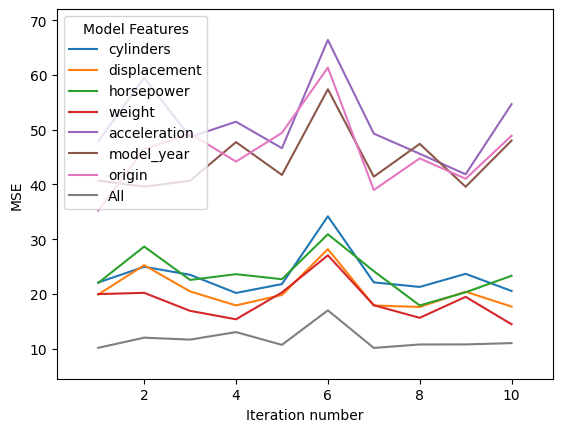

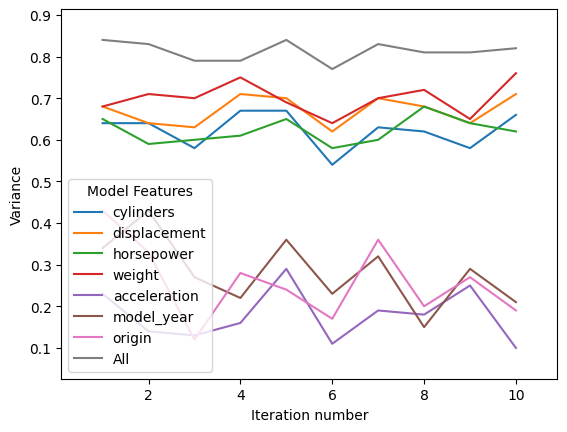

In [19]:
for feature in features_mse:
    plt.plot(range(1,11),features_mse[feature],label=feature)
plt.legend(title='Model Features')    
plt.margins(0.1)
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.show()

for feature in features_var:
    plt.plot(range(1,11),features_var[feature],label=feature)

plt.legend(title='Model Features')
plt.margins(0.1)
plt.xlabel('Iteration number')
plt.ylabel('Variance')
plt.show()

Q1. Based upon the linear models you generated, which feature appears to be most
predictive for the target feature? Note that you can answer this question based
upon the output provided for the linear models

A. combination of all features have more potential to predict the target feature

Q2. Suppose you need to select two features for a linear regression model to predict
the target feature. Which two features would you select? Why?

A. weight and displacement, because they have higher Variance, The coefficient of determination is often used as a measure of how well a regression model explains the variability in the dependent variable, with higher values indicating a better fit of the model to the data. Also those features alone as well performed far better than other features in terms of MSE.

Q3. Examine all the plots and numbers you have, do you have any comments on them?
Do you find any surprising trends? Do you have any idea about what might be
causing this surprising trend in the data? This is a descriptive question meant to
encourage you to interpret your results and express yourself.

A. displacement,horsepower and weight have more prediction power as compared to other features and same can be confirmed by their low MSE and high Variance Score (R-squared,R2). I didn't find any surprising trends.